In this notebook we apply squidpy to identify SVFs using moransI and gearysC across datasets

# Loading the needed packages

The first step is to load the needed packages. If any of them fails, please go and check that they are installed in the appropiate environment

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import squidpy as sq
import scanpy as sc
import os

In [48]:
maindir='../../data/unprocessed_adata/'
output_dir='../../data/unprocessed_adata_nuclei/'
files=os.listdir(maindir)
files=['ms_brain_multisection1.h5ad',
       'human_brain.h5ad',
 'ms_brain_multisection2.h5ad',
 'ms_brain_multisection3.h5ad',
'realmouse_1.h5ad',
 'realmouse_2.h5ad',
 'realmouse_3.h5ad',
 'realmouse_4.h5ad',
#    'hbreast_idc_addon_set1.h5ad',
# 'hbreast_idc_addon_set2.h5ad',
# 'hbreast_idc_addon_set4.h5ad',
# 'hbreast_idc_entiresample_set3.h5ad',
 'hbreast_ilc_addon_set2.h5ad',
 'hbreast_ilc_addon_set4.h5ad',
 'hbreast_ilc_entiresample_set3.h5ad',
 'healthy_lung.h5ad',
 'human_alzheimers.h5ad',
 'human_gbm.h5ad',
 'human_spinal_chord_active.h5ad',
 'human_spinal_chord_inactive.h5ad',
 'h_breast_1.h5ad',
 'h_breast_2.h5ad',
 'lung_cancer.h5ad',
 'ms_brain_fullcoronal.h5ad',
 'ms_brain_partialcoronal.h5ad',
 ]

In [55]:
sq.gr.spatial_autocorr(adata1, mode="geary")
hs_results=adata1.uns['gearyC']
hs_results['rank']=list(hs_results['C'].rank(ascending=False))

In [50]:
sq.gr.spatial_autocorr(adata1, mode="geary")
hs_results=adata1.uns['gearyC']
hs_results['rank']=list(hs_results['C'].rank())
hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
hs_results.columns=['Pval','FDR','rank']

In [57]:
##this is with all cells

for f in files[:]:
    try:
        print(f)
        adata1=sc.read(output_dir+f)
        adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
        adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
        adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
        adata1.layers['raw']=adata1.X
        sq.gr.spatial_neighbors(adata1,radius=50.0,coord_type ='generic')
        sq.gr.spatial_autocorr(adata1, mode="moran")
        hs_results=adata1.uns["moranI"]
        hs_results['rank']=list(hs_results['I'].rank())
        hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
        hs_results.columns=['Pval','FDR','rank']
        hs_results.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__squidpy_MoranI.csv')
        ###gearyc
        sq.gr.spatial_autocorr(adata1, mode="geary")
        hs_results=adata1.uns['gearyC']
        hs_results['rank']=list(hs_results['C'].rank(ascending=False))
        hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
        hs_results.columns=['Pval','FDR','rank']
        hs_results.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__squidpy_gearyC.csv')
        ##
        sc.pp.highly_variable_genes(adata1)
        adata1.var['rank']=adata1.var['dispersions'].rank()
        hvg=adata1.var
        hvg=hvg.loc[:,['highly_variable','dispersions_norm','rank']]
        hvg.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__highly_variable_scanpy.csv')
    except:
        print('not possible')

ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_brain.h5ad
ms_brain_multisection2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:200: RuntimeWarning: overflow encountered in expm1
  X = np.expm1(X)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:12: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean**2


not possible
ms_brain_multisection3.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_3.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_4.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:200: RuntimeWarning: overflow encountered in expm1
  X = np.expm1(X)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:12: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean**2


not possible
hbreast_ilc_addon_set2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


hbreast_ilc_addon_set4.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


hbreast_ilc_entiresample_set3.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


healthy_lung.h5ad
human_alzheimers.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_gbm.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_spinal_chord_active.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_spinal_chord_inactive.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


h_breast_1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


h_breast_2.h5ad
lung_cancer.h5ad
ms_brain_fullcoronal.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


ms_brain_partialcoronal.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


In [58]:
#this is with subset 5000 cells

for f in files[:]:
    try:
        print(f)
        adata1=sc.read(output_dir+f)
        adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
        adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
        adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
        adata1.layers['raw']=adata1.X
        import random
        some=random.sample(range(0,adata1.shape[0]),5000)
        adata1=adata1[some,:]
        sq.gr.spatial_neighbors(adata1,radius=50.0,coord_type ='generic')
        sq.gr.spatial_autocorr(adata1, mode="moran")
        hs_results=adata1.uns["moranI"]
        hs_results['rank']=list(hs_results['I'].rank())
        hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
        hs_results.columns=['Pval','FDR','rank']
        hs_results.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__squidpy5000_MoranI.csv')
        ###gearyc
        sq.gr.spatial_autocorr(adata1, mode="geary")
        hs_results=adata1.uns['gearyC']
        hs_results['rank']=list(hs_results['C'].rank(ascending=False))
        hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
        hs_results.columns=['Pval','FDR','rank']
        hs_results.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__squidpy5000_gearyC.csv')
        sc.pp.highly_variable_genes(adata1)
        adata1.var['rank']=adata1.var['dispersions'].rank()
        hvg=adata1.var
        hvg=hvg.loc[:,['highly_variable','dispersions_norm','rank']]
        hvg.to_csv('../../figures/SVF/'+str(f.split('.')[0])+'__highly_variable5000_scanpy.csv')
    except:
        print('not possible')

ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 1 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_brain.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 7 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


ms_brain_multisection2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 1 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:200: RuntimeWarning: overflow encountered in expm1
  X = np.expm1(X)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:12: RuntimeWarning: invalid value encountered in subtract
  var = mean_sq - mean**2


not possible
ms_brain_multisection3.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 2 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_3.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


realmouse_4.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


hbreast_ilc_addon_set2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 8 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


hbreast_ilc_addon_set4.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 25 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


hbreast_ilc_entiresample_set3.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 19 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


healthy_lung.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 22 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


human_alzheimers.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 48 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_gbm.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 2 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_spinal_chord_active.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 3 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


human_spinal_chord_inactive.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 6 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


h_breast_1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 5 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


h_breast_2.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 31 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


lung_cancer.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 22 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


ms_brain_fullcoronal.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 1 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


ms_brain_partialcoronal.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 5 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values


# Compute time that it takes to run

In [29]:
import time
f='ms_brain_multisection1.h5ad'
cells=[500,1000,5000,10000,50000,100000]

In [30]:
times_hvg=[]
times_I=[]
times_G=[]
for cel in cells:
    print(f)
    start_time = time.time()
    adata1=sc.read(output_dir+f)
    adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
    adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
    adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
    adata1.layers['raw']=adata1.X
    import random
    some=random.sample(range(0,adata1.shape[0]),int(cel))
    adata1=adata1[some,:]
    sq.gr.spatial_neighbors(adata1,radius=50.0,coord_type ='generic')
    sq.gr.spatial_autocorr(adata1, mode="moran")
    hs_results=adata1.uns["moranI"]
    hs_results['rank']=list(hs_results['I'].rank())
    hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
    hs_results.columns=['Pval','FDR','rank']
    end_time = time.time()
    times_I.append(end_time - start_time)
    
    ###gearyc
    print(f)
    start_time = time.time()
    adata1=sc.read(output_dir+f)
    adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
    adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
    adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
    adata1.layers['raw']=adata1.X
    import random
    some=random.sample(range(0,adata1.shape[0]),int(cel))
    adata1=adata1[some,:]
    sq.gr.spatial_neighbors(adata1,radius=50.0,coord_type ='generic')
    sq.gr.spatial_autocorr(adata1, mode="geary")
    hs_results=adata1.uns['gearyC']
    hs_results['rank']=list(hs_results['C'].rank(ascending=False))
    hs_results=hs_results.loc[:,['pval_norm','pval_norm_fdr_bh','rank']]
    hs_results.columns=['Pval','FDR','rank']
    end_time = time.time()
    times_G.append(end_time - start_time)
    
    # hvg
    print(f)
    start_time = time.time()
    adata1=sc.read(output_dir+f)
    adata1.obsm["spatial"]=np.array([adata1.obs.x_centroid,adata1.obs.y_centroid]).transpose().astype('float64')
    adata1.obsm['spatial']=np.array(adata1.obs.loc[:,['x_centroid','y_centroid']])
    adata1=sc.AnnData(adata1.X,obs=adata1.obs,var=adata1.var,obsm=adata1.obsm)
    adata1.layers['raw']=adata1.X
    import random
    some=random.sample(range(0,adata1.shape[0]),int(cel))
    adata1=adata1[some,:]
    sc.pp.highly_variable_genes(adata1)
    adata1.var['rank']=adata1.var['dispersions'].rank()
    hvg=adata1.var
    hvg=hvg.loc[:,['highly_variable','dispersions_norm','rank']]
    end_time = time.time()
    times_hvg.append(end_time - start_time)
    print(times_hvg)

ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 69 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 72 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[0.37852025032043457]
ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 28 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/metrics/_gearys_c.py:295: UserWarning: 35 variables were constant, will return nan for these.
  f"{len(idxer) - idxer.sum()} variables were constant, will return nan for these.",


ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[0.37852025032043457, 0.3820958137512207]
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[0.37852025032043457, 0.3820958137512207, 0.4077012538909912]
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[0.37852025032043457, 0.3820958137512207, 0.4077012538909912, 0.5410487651824951]
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[0.37852025032043457, 0.3820958137512207, 0.4077012538909912, 0.5410487651824951, 0.8866968154907227]
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad
ms_brain_multisection1.h5ad


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:240: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_std_bin[df['mean_bin'].values].values
/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


[0.37852025032043457, 0.3820958137512207, 0.4077012538909912, 0.5410487651824951, 0.8866968154907227, 1.5748357772827148]


In [40]:
timesres=pd.DataFrame([cells,times_hvg,times_I,times_G],index=['cells','times_hvg','times_I','times_G']).transpose()

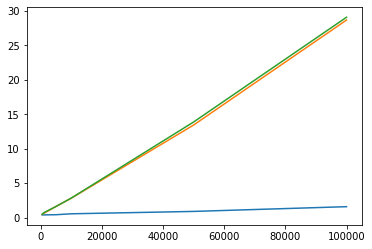

In [41]:
plt.plot(timesres['cells'],timesres['times_hvg'])
plt.plot(timesres['cells'],timesres['times_I'])
plt.plot(timesres['cells'],timesres['times_G'])

In [43]:
timesres.to_csv('../../figures/times_svf/squidpy_times.csv')

## We could also compute the neiborhood enrichment

In [2]:
saving_path=r'../../data/processed_adata/'
adata=sc.read(saving_path+'/adata_multisection_nuclei_3rep_withHM_withclusters.h5ad')

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


[FROM SQUIDPY TUTORIALS] We can investigate spatial organization of clusters in a quantitative way, by computing a neighborhood enrichment score. You can compute such score with the following function: squidpy.gr.nhood_enrichment(). In short, it’s an enrichment score on spatial proximity of clusters: if spots belonging to two different clusters are often close to each other, then they will have a high score and can be defined as being enriched. On the other hand, if they are far apart, the score will be low and they can be defined as depleted. This score is based on a permutation-based test, and you can set the number of permutations with the n_perms argument (default is 1000).

In [7]:
LISTCOLOC=[]
LISTSAMPLES=[]
anndata_list = []
LISTSIZE=[]
for sample in adata.obs['replicate'].unique():
    adata_copy_int = adata[adata.obs['replicate']==sample]
    sq.gr.spatial_neighbors(adata_copy_int,radius=50.0,coord_type ='generic')
    anndata_list.append(adata_copy_int)
    adatasub=adata_copy_int#ad_sp_concat
    adatasub.obs['Class']=adatasub.obs['Class'].astype('category')
    if len(np.unique(adatasub.obs['Class']))==len(np.unique(adata.obs['Class'])):
        arr=np.unique(adatasub.obs['Class'])
        SPAT=sq.gr.nhood_enrichment(adatasub, cluster_key="Class",copy=True)
        coloc=pd.DataFrame(SPAT[0])
        coloc.index=np.unique(adatasub.obs['Class'])
        coloc.columns=np.unique(adatasub.obs['Class'])
        LISTCOLOC.append(coloc)
        LISTSAMPLES.append(sample)
        LISTSIZE.append(adatasub.obs.shape[0])
ad_sp_concat = sc.concat(anndata_list, pairwise=True)

/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


/home/sergio/anaconda3/envs/xb/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:08<00:00,  5.30/s]


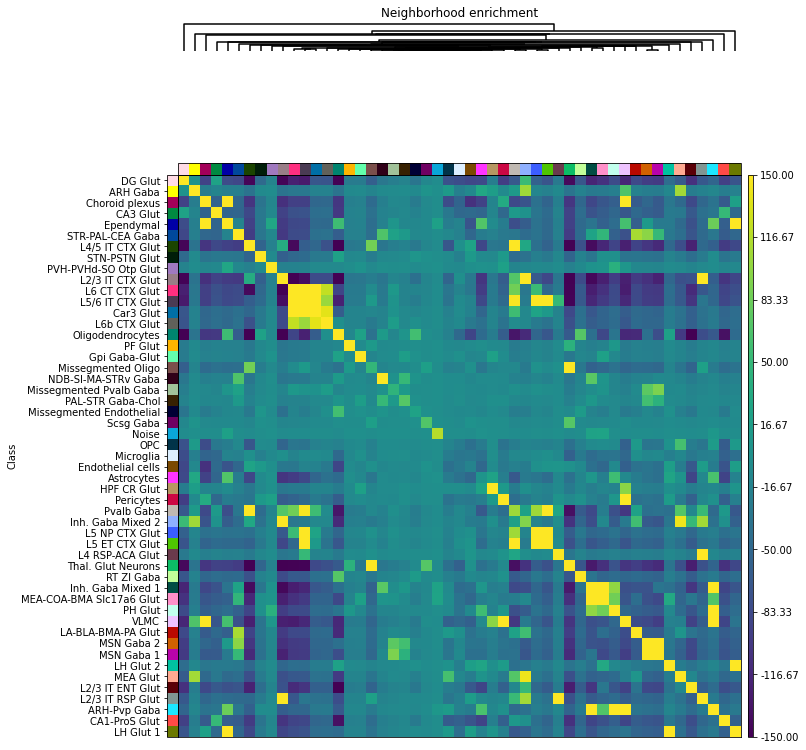

In [8]:
adatasub=ad_sp_concat
adatasub.obs['Class']=adatasub.obs['Class'].astype('category')
sq.gr.nhood_enrichment(adatasub, cluster_key="Class")
sq.pl.nhood_enrichment(adatasub, cluster_key="Class",vmax=150,vmin=-150,figsize=(10,10),method='average',cmap='viridis',show=False)
#plt.savefig('../../figures/architecture_exploration_multisection/global_nhood_50um_viridis_allcelltypes.pdf')

In [9]:
exprmat=sq.gr.nhood_enrichment(adatasub, cluster_key="Class",copy=True)

100%|█████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:06<00:00,  5.37/s]


In [11]:
from utag import utag

In [63]:
level='Class'
adatasub.uns[level+'_nhood_enrichment']['zscore']=np.array(exprmat[0])
adatasub.uns['utag_matrix']=pd.DataFrame(adatasub.uns[level+'_nhood_enrichment']['zscore'],index=np.unique(adatasub.obs['Class']),columns=np.unique(adatasub.obs['Class']))

In [64]:
adatasub.uns['utag_matrix'].index=adatasub.uns['utag_matrix'].index.astype(str)
adatasub.uns['utag_matrix'].columns=adatasub.uns['utag_matrix'].columns.astype(str)
adatasub.uns['utag_matrix'][adatasub.uns['utag_matrix']<0]=0
for ind in adatasub.uns['utag_matrix'].index:
       adatasub.uns['utag_matrix'].loc[ind,ind]=0

In [65]:
def draw_network(
    adata,
    node_key: str = 'UTAG Label',
    adjacency_matrix_key: str = 'UTAG Label_domain_adjacency_matrix',
    figsize: tuple = (11,11),
    dpi: int = 200,
    font_size: int = 12,
    node_size_min: int = 1000,
    node_size_max: int = 3000,
    edge_weight: float = 5,
    edge_weight_baseline: float = 1,
    log_transform: bool = True,
    ax = None
):
    import networkx as nx
    import matplotlib
    sc.set_figure_params(scanpy=True, dpi=150, dpi_save=150, frameon=False, vector_friendly=True, fontsize=7, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    s1 = adata.obs.groupby(node_key).count()
    s1 = s1[s1.columns[0]]
    node_size = s1.values
    node_size = (node_size - node_size.min()) / (node_size.max() - node_size.min()) * (node_size_max - node_size_min) + node_size_min
    
    if ax == None:
        fig = plt.figure(figsize = figsize, dpi = dpi)
    G = nx.from_numpy_matrix(np.matrix(adata.uns[adjacency_matrix_key]), create_using=nx.Graph)
    G = nx.relabel.relabel_nodes(G, {i: label for i, label in enumerate(adata.uns[adjacency_matrix_key].index)})
    
    edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
    
    weights = np.array(list(weights))
    weights = (weights - weights.min()) / (weights.max() - weights.min()) * edge_weight + edge_weight_baseline
    
    if log_transform:
        weights = np.log(np.array(list(weights))+1)
    else:
        weights = np.array(list(weights))
        
    weights = tuple(weights.tolist())
    
    #pos = nx.spectral_layout(G, weight = 'weight')
    pos = nx.spring_layout(G, weight = 'weight', seed = 42, k = 0.7)
    
    if ax:
        nx.draw(G, pos, node_color='w', edgelist=edges, edge_color=weights, width=weights, edge_cmap=plt.cm.Reds, with_labels=True, font_size = font_size, node_size = node_size, ax = ax)
    else:
        nx.draw(G, pos, node_color='w', edgelist=edges, edge_color=weights, width=weights, edge_cmap=plt.cm.Reds, with_labels=True, font_size = font_size, node_size = node_size)

    if ax == None:
        ax = plt.gca()
    
    color_key = node_key + '_colors'
    if color_key in adata.uns:
        ax.collections[0].set_edgecolor(adata.uns[color_key])
        ax.collections[0].set_facecolor(adata.uns[color_key])
    else:
        ax.collections[0].set_edgecolor('lightgray')
    ax.collections[0].set_linewidth(3)
    ax.set_xlim([1.3*x for x in ax.get_xlim()])
    ax.set_ylim([1*y for y in ax.get_ylim()])
    
    if ax == None:
        return fig

In [66]:
adatasub.uns['Class_colors']=adata.uns['Class_colors']

In [67]:
adatasub.uns['plotting_matrix']=adatasub.uns['utag_matrix'][:]
#adatasub.uns['plotting_matrix'][adatasub.uns['plotting_matrix']>100]=50

In [70]:
adatasub.uns['plotting_matrix']=np.log1p(adatasub.uns['plotting_matrix'])

In [73]:
fig = draw_network(
    adata=adatasub,
    adjacency_matrix_key='plotting_matrix',
    node_key='Class',
    font_size=7,
    edge_weight = 1,
    edge_weight_baseline=0.2,
    dpi=400,
    node_size_max=500,
    node_size_min=50,
    log_transform=False,
)
plt.savefig('../../figures/architecture_exploration_multisection/network_squidpy_&hm_global_nhood_50um_allcelltypes.pdf')

Using this type of analysis, we can find colocalizing clusters (the ones with higher values). The higher the values are, the more enriched a cluster is next to a second cluster. This plot typically gives very high values for a pair of clusters and much lower values, but still interesting, for others, so it's important to play with the "vmax" parameter of the pl function and reduce the maximum value we can visualize to highlight differences between other clusters

# Interaction matrix

Squidpy provides other descriptive statistics of the spatial graph. For instance, the interaction matrix, which counts the number of edges that each cluster share with all the others. This score can be computed with the function squidpy.gr.interaction_matrix(). We can visualize the results with squidpy.pl.interaction_matrix()

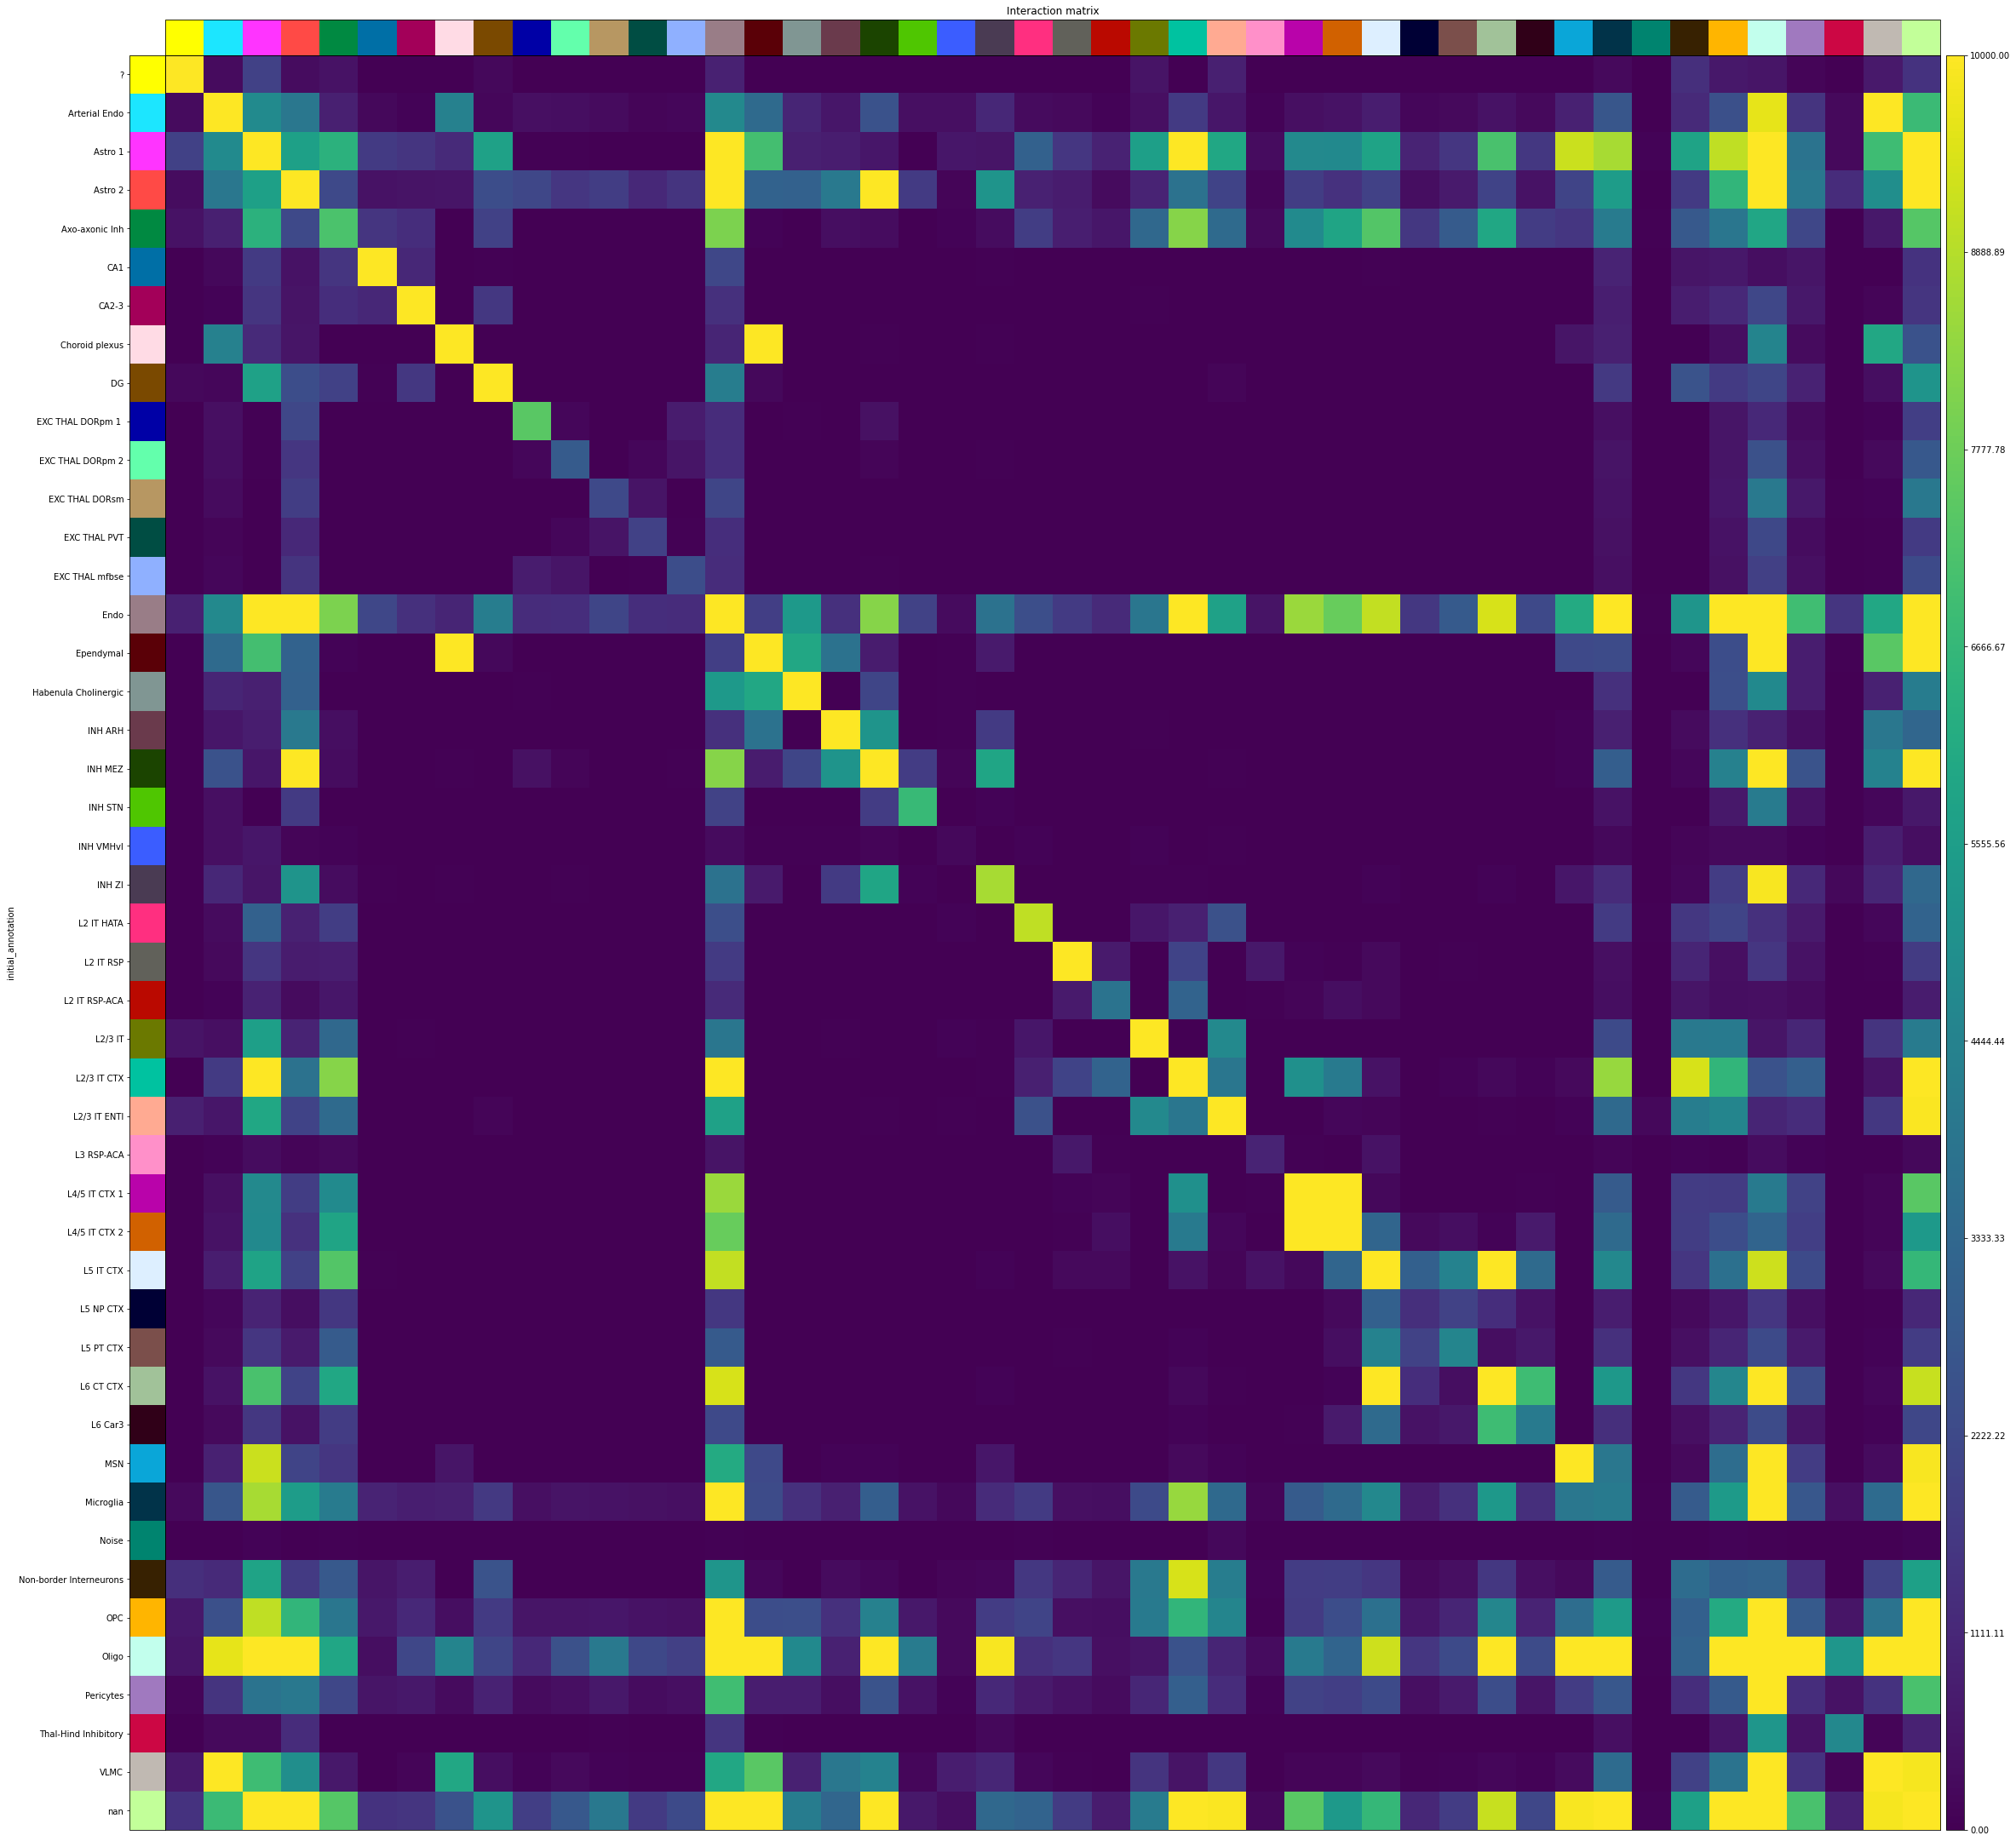

In [13]:
sq.gr.interaction_matrix(adatasub, cluster_key="initial_annotation")
sq.pl.interaction_matrix(adatasub, cluster_key="initial_annotation",vmax=10000,show=False)
plt.savefig('../../figures/architecture_exploration_multisection/interaction_matrix_50um_viridis_allcelltypes.pdf')

# Co-occurence of clusters

In addition to the neighbor enrichment score, we can visualize cluster co-occurrence in spatial dimensions. This is a similar analysis of the one presented above, yet it does not operate on the connectivity matrix, but on the original spatial coordinates. The co-occurrence score is the conditional probability of observing a cluster  conditioned on the presence of a cluster in the radius size of interest. The score is computed across increasing radii size around each cell in the tissue.

We can compute this score with squidpy.gr.co_occurrence() and set the cluster annotation for the conditional probability with the argument clusters. Then, we visualize the results with squidpy.pl.co_occurrence().

It can take a while to run the graph, so it's interesting to separate sq.gr.co_occurence() from sq.pl.co_occurrence() in two different chunks of code and just run the plot if we want to change anything

In [ ]:
sq.gr.co_occurrence(adatasub, cluster_key="initial_annotation",n_splits=1)

In [ ]:
print('a')

We plot how neiborhood enrichement change in depending on the distance used. We specify our key, so the variable that contains our cell types, together with the cluster that we use as a reference for calculating the enrichement from.

In [15]:
adatasub.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
ind                                                            
1             1  1557.532239  2528.022437                327   
2             2  1560.669312  2543.632678                354   
3             3  1570.462885  2530.810461                422   
4             4  1573.927734  2546.454529                250   
5             5  1581.344379  2557.024951                550   
...         ...          ...          ...                ...   
162029   162029  8310.558740  4345.094580                555   
162030   162030  8316.195801  4321.954077                266   
162031   162031  8323.133594  4271.474121                488   
162032   162032  8327.415137  4348.097388                176   
162033   162033  8326.575928  4248.579736                328   

        control_probe_counts  control_codeword_counts  total_counts  \
ind                                                                   
1                          0                        0           327   
2                          0                        0           354   
3                          0                        0           422   
4                          0                        0           250   
5                          1                        0           550   
...                      ...                      ...           ...   
162029                     0                        0           555   
162030                     0                        0           266   
162031                     0                        1           488   
162032                     0                        0           176   
162033                     0                        0           328   

         cell_area  nucleus_area replicate  ... leiden_1_4 leiden_0_6  \
ind                                         ...                         
1       240.953750     63.038125         1  ...         14          5   
2       211.692500     65.476562         1  ...         15          7   
3       186.946875     69.540625         1  ...         14          5   
4       239.237812     61.728594         1  ...          2          1   
5       438.692969     92.209063         1  ...         14          5   
...            ...           ...       ...  ...        ...        ...   
162029  515.955312     76.991406         1  ...         18         10   
162030  268.002344     13.637187         1  ...         11         10   
162031  346.483906     77.036563         1  ...         33         22   
162032  169.922969      9.889219         1  ...         23         10   
162033  210.066875     18.920469         1  ...         23         10   

                   X             Y    X_umap    Y_umap             Class  \
ind                                                                        
1        7329.559812  11896.570224  5.377941  1.642284  Cort. Excitatory   
2        7344.322500  11970.030148  3.097112  5.865565    C-H Inhibitory   
3        7390.409879  11909.690334  5.369297  1.808224  Cort. Excitatory   
4        7406.715047  11983.309438  6.870032 -4.590629        Astrocytes   
5        7441.616885  12033.052577  5.166023  1.986040  Cort. Excitatory   
...              ...           ...       ...       ...               ...   
162029  39108.492164  20447.493682 -0.050166 -3.946683  Cort. Excitatory   
162030  39135.019495  20338.597253  0.716963 -3.840661  Cort. Excitatory   
162031  39167.667916  20101.044637 -0.167035 -6.420848  Cort. Excitatory   
162032  39187.816344  20461.624535  3.721441 -0.632156  Cort. Excitatory   
162033  39183.867127  19993.306410  0.581143 -3.761473  Cort. Excitatory   

       cell_code initial_annotation celltype_annotation  
ind                                                      
1            1_1        L2/3 IT CTX         L2/3 IT CTX  
2            2_1     Axo-axonic Inh      Axo-axonic Inh  
3            3_1        L2/3 IT CTX         L2/3 IT CTX  
4            4_1      

In [16]:
cluster_assessed="DG"
sq.pl.co_occurrence(
    adata,
    cluster_key="initial_annotation",
    clusters=cluster_assessed,
    figsize=(10, 5),show=False)
plt.savefig('../../figures/architecture_exploration_multisection/co_occurence_'+cluster_assessed+'.pdf')

KeyError: "Unable to get the data from `adata.uns['initial_annotation_co_occurrence']`. Please run `squidpy.gr.co_occurrence(..., cluster_key='initial_annotation')` first."

# Properties of the spatial graph

Similar to the previous analysis, we can investigate properties of the spatial graph by computing different network centralities:

degree_centrality.

average_clustering.

closeness_centrality.

Squidpy provides a convenient function for all of them: squidpy.gr.centrality_scores() and squidpy.pl.centrality_scores() for visualization.

In [74]:
sq.gr.centrality_scores(adatasub,
    cluster_key="Class")


ERROR: Unable to fetch palette, reason: 'initial_annotation_colors'. Using `None`.


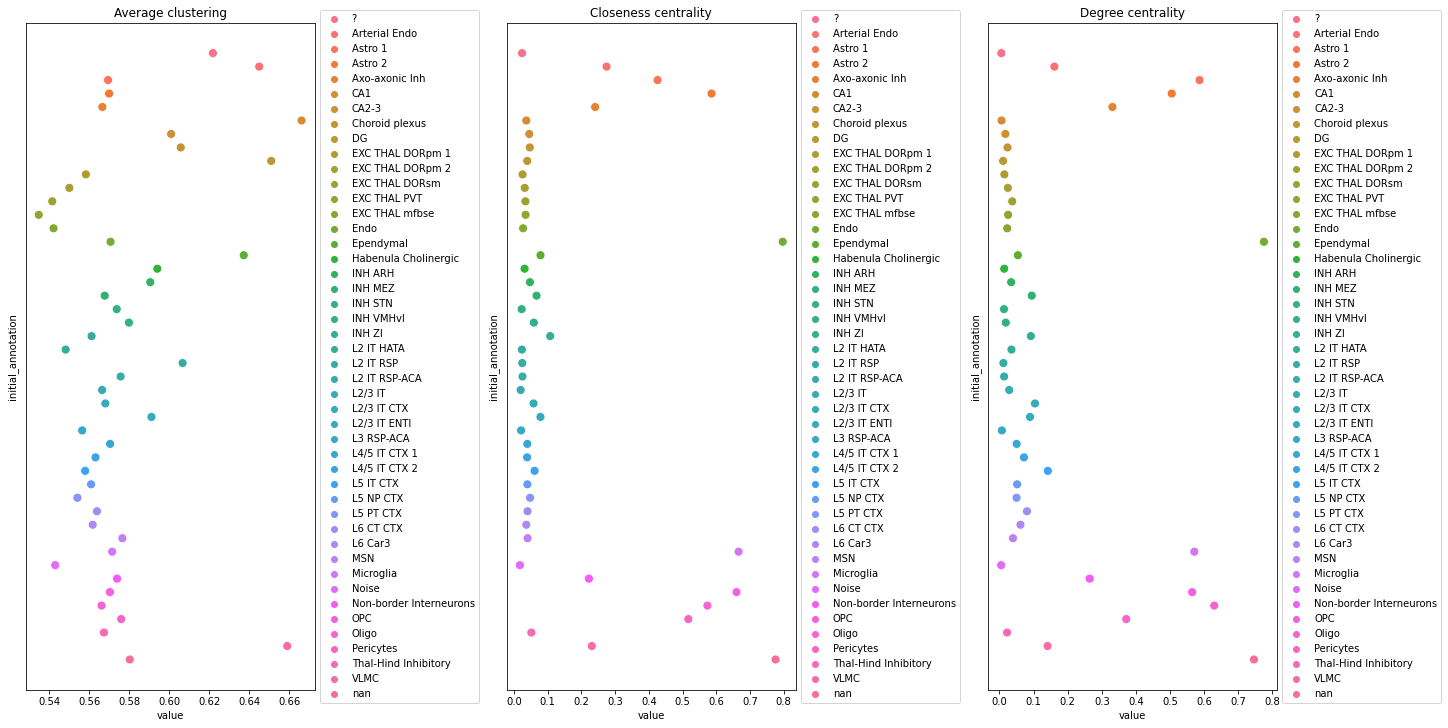

In [18]:
sq.pl.centrality_scores(adatasub, cluster_key="Class", figsize=(20, 10), s=80)#,show=False)
plt.savefig('../../figures/architecture_exploration_multisection/centrality_scores_&hm.pdf')

A summary of what the statistics meaning is:

-’average_clustering’ - measure of the degree to which nodes cluster together.
-’closeness_centrality’ - measure of how close the group is to other nodes.
-’degree_centrality’ - fraction of non-group members connected to group members.

More information can be found in this publication: https://www.biorxiv.org/content/10.1101/2020.02.17.947416v3

# Graph autocorrelation

With Squidpy we can investigate spatial variability of gene expression. squidpy.gr.spatial_autocorr() conveniently wraps two spatial autocorrelation statistics: Moran’s I and Geary’s C*. They provide a score on the degree of spatial variability of gene expression. The statistic as well as the p-value are computed for each gene, and FDR correction is performed. For the purpose of this tutorial, let’s compute the Moran’s I score. See Compute Moran’s I score for more details

In [75]:
sq.gr.spatial_autocorr(adatasub, mode="moran")
adatasub.uns["moranI"].head(10)

I  pval_norm      var_norm  pval_norm_fdr_bh
Slc17a7  0.563141        0.0  1.087506e-07               0.0
Neurod6  0.512485        0.0  1.087506e-07               0.0
Nrn1     0.448280        0.0  1.087506e-07               0.0
Spag16   0.436099        0.0  1.087506e-07               0.0
Satb2    0.430543        0.0  1.087506e-07               0.0
Lamp5    0.420691        0.0  1.087506e-07               0.0
Slc13a4  0.415084        0.0  1.087506e-07               0.0
Slc17a6  0.402758        0.0  1.087506e-07               0.0
Bhlhe22  0.400214        0.0  1.087506e-07               0.0
Fmod     0.398536        0.0  1.087506e-07               0.0

In [81]:
adatasub.uns["moranI"].sort_values(by='I')

I  pval_norm      var_norm  pval_norm_fdr_bh
Spi1     0.005934        0.0  1.087506e-07               0.0
Ikzf1    0.006844        0.0  1.087506e-07               0.0
Cd300c2  0.007731        0.0  1.087506e-07               0.0
Siglech  0.011815        0.0  1.087506e-07               0.0
Cd68     0.013355        0.0  1.087506e-07               0.0
...           ...        ...           ...               ...
Satb2    0.430543        0.0  1.087506e-07               0.0
Spag16   0.436099        0.0  1.087506e-07               0.0
Nrn1     0.448280        0.0  1.087506e-07               0.0
Neurod6  0.512485        0.0  1.087506e-07               0.0
Slc17a7  0.563141        0.0  1.087506e-07               0.0

[248 rows x 4 columns]

In [77]:
adatasub.uns["moranI"].to_csv('../../figures/tables/moranI_nuclei_rep1_multisection_&hm.csv')

In [78]:
sq.gr.spatial_autocorr(adatasub, mode="geary")
adatasub.uns["gearyC"].head(10)

C  pval_norm      var_norm  pval_norm_fdr_bh
Slc17a7  0.437836        0.0  1.087506e-07               0.0
Neurod6  0.490778        0.0  1.087506e-07               0.0
Nrn1     0.552055        0.0  1.087506e-07               0.0
Spag16   0.569545        0.0  1.087506e-07               0.0
Satb2    0.571282        0.0  1.087506e-07               0.0
Lamp5    0.581166        0.0  1.087506e-07               0.0
Slc13a4  0.589127        0.0  1.087506e-07               0.0
Slc17a6  0.598554        0.0  1.087506e-07               0.0
Bhlhe22  0.603529        0.0  1.087506e-07               0.0
Fmod     0.605603        0.0  1.087506e-07               0.0

In [79]:
adatasub.uns["gearyC"]

C      pval_norm      var_norm  pval_norm_fdr_bh
Slc17a7  0.437836   0.000000e+00  1.087506e-07      0.000000e+00
Neurod6  0.490778   0.000000e+00  1.087506e-07      0.000000e+00
Nrn1     0.552055   0.000000e+00  1.087506e-07      0.000000e+00
Spag16   0.569545   0.000000e+00  1.087506e-07      0.000000e+00
Satb2    0.571282   0.000000e+00  1.087506e-07      0.000000e+00
...           ...            ...           ...               ...
Siglech  0.982456   0.000000e+00  1.087506e-07      0.000000e+00
Cd68     0.984198   0.000000e+00  1.087506e-07      0.000000e+00
Cd300c2  0.986817   0.000000e+00  1.087506e-07      0.000000e+00
Ikzf1    0.987008   0.000000e+00  1.087506e-07      0.000000e+00
Spi1     0.987815  3.726026e-299  1.087506e-07     3.726026e-299

[248 rows x 4 columns]

In [80]:
adatasub.uns["gearyC"].to_csv('../../figures/tables/gearyC_nuclei_rep1_multisection_&hm.csv')

# Spatial organization of cell types (Ripley's K)

In addition to the neighbor enrichment score, we can further investigate spatial organization of cell types in tissue by means of the Ripley’s statistics. Ripley’s statistics allow analyst to evaluate whether a discrete annotation (e.g. cell-type) appears to be clustered, dispersed or randomly distributed on the area of interest. In Squidpy, we implement three closely related Ripley’s statistics, that can be easily computed with squidpy.gr.ripley(). Here, we’ll showcase the Ripley’s L statistic, which is a variance-stabilized version of the Ripley’s K statistics. We’ll visualize the results with squidpy.pl.ripley(). Check Compute Ripley’s statistics for more details.



In [27]:
adatasub

AnnData object with n_obs × n_vars = 162018 × 248
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'replicate', 'leiden_2_2', 'leiden_1_4', 'leiden_0_6', 'X', 'Y', 'X_umap', 'Y_umap', 'Class', 'cell_code', 'initial_annotation', 'celltype_annotation'
    uns: 'initial_annotation_nhood_enrichment', 'initial_annotation_interactions', 'initial_annotation_centrality_scores', 'moranI', 'gearyC'
    obsm: 'X_pca', 'X_umap', 'spatial'
    layers: 'raw'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

ERROR: Unable to fetch palette, reason: 'initial_annotation_colors'. Using `None`.


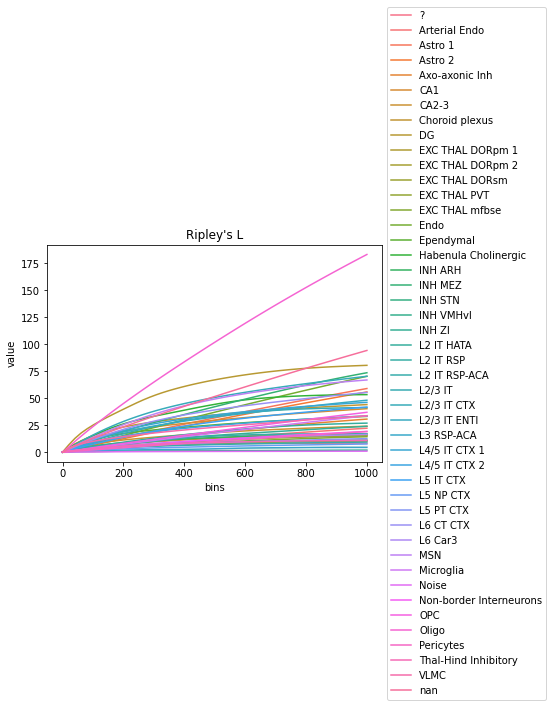

In [28]:
mode = "L"
sq.gr.ripley(adatasub, cluster_key="initial_annotation", mode=mode, max_dist=1000)
sq.pl.ripley(adatasub, cluster_key="initial_annotation", mode=mode)